In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
matplotlib.rcParams['figure.figsize'] = [12, 6]

In [2]:
df_feat = pickle.load(open('data/features.pkl', 'rb'))
for i in df_feat.columns:
    df_feat[i] = df_feat[i].astype(float)

In [3]:
df_target = pickle.load(open('data/target.pkl', 'rb'))

Let's see the data 

In [4]:
df_target.head(20)

,0
2019-01-08 00:00:00+00:00,2.857432
2019-01-08 00:30:00+00:00,2.868542
2019-01-08 01:00:00+00:00,2.832536
2019-01-08 01:30:00+00:00,2.874722
2019-01-08 02:00:00+00:00,2.874747
2019-01-08 02:30:00+00:00,2.902512
2019-01-08 03:00:00+00:00,2.888002
2019-01-08 03:30:00+00:00,2.891085
2019-01-08 04:00:00+00:00,2.874879
2019-01-08 04:30:00+00:00,2.848664


In [5]:
df_feat.head(20)

,0,1,2
2019-01-08 00:00:00+00:00,2.778776,2.795029,2.550405
2019-01-08 00:30:00+00:00,2.795336,2.778668,2.550405
2019-01-08 01:00:00+00:00,2.806959,2.761620,2.550405
2019-01-08 01:30:00+00:00,2.810723,2.762358,2.552570
2019-01-08 02:00:00+00:00,2.814365,2.775047,2.554735
2019-01-08 02:30:00+00:00,2.815961,2.770021,2.556901
2019-01-08 03:00:00+00:00,2.816715,2.761558,2.554735
2019-01-08 03:30:00+00:00,2.815843,2.754798,2.549323
2019-01-08 04:00:00+00:00,2.814966,2.743802,2.540663
2019-01-08 04:30:00+00:00,2.809529,2.743607,2.527673


Let's check if there is many missing points 

In [6]:
df_feat[df_feat[0].isna()]

,0,1,2
2019-07-20 02:30:00+00:00,NaN,NaN,NaN
2019-07-20 04:30:00+00:00,NaN,NaN,NaN
2019-07-20 05:30:00+00:00,NaN,NaN,NaN
2019-07-20 06:30:00+00:00,NaN,NaN,NaN
2019-07-20 07:30:00+00:00,NaN,NaN,NaN
...,...,...,...
2019-07-28 09:30:00+00:00,NaN,NaN,NaN
2019-07-28 18:00:00+00:00,NaN,NaN,NaN
2019-07-28 18:30:00+00:00,NaN,NaN,NaN
2019-07-28 19:00:00+00:00,NaN,NaN,NaN


So quite some missing points. Let's see the plot to see if it is reasonable to interpolate missing points

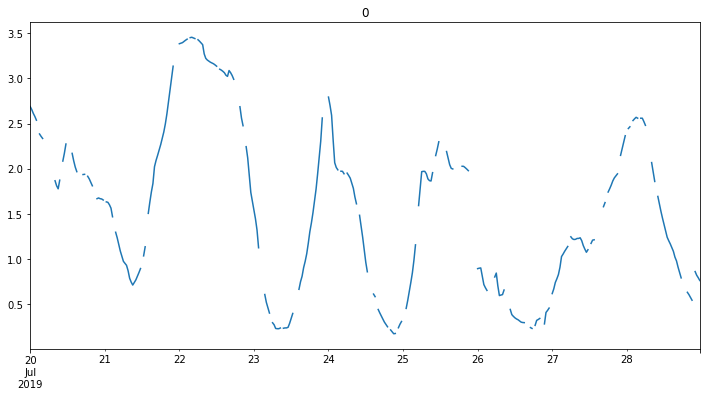

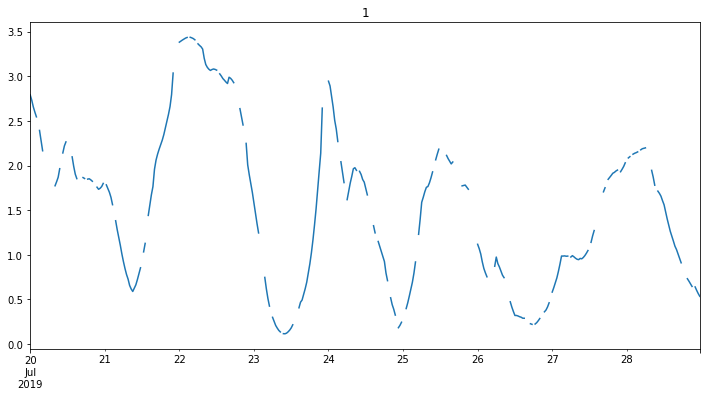

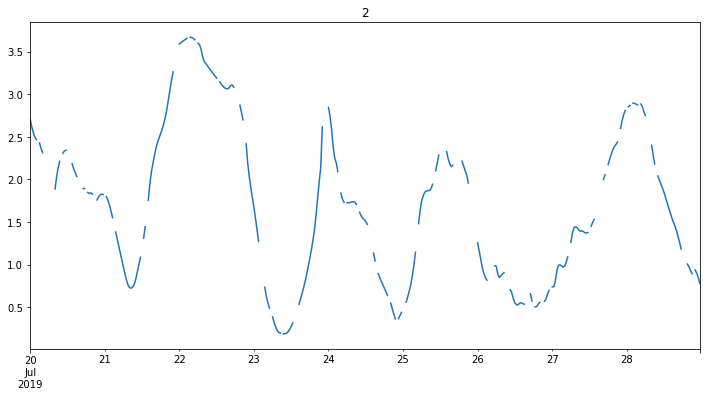

In [7]:
for i in df_feat.columns:
    df_feat.loc['2019-07-20':'2019-07-28',i].plot()
    plt.title(i)
    plt.show()

Okay it looks like it is okay to fill nans with linear interpolation since there are not many consecutive missing points

In [8]:
df_feat = df_feat.interpolate('linear')

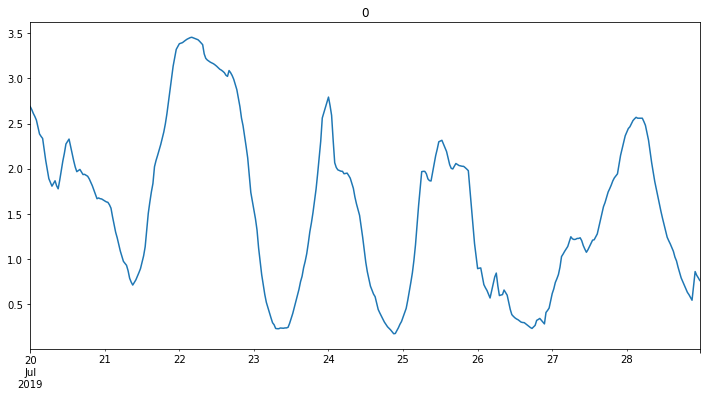

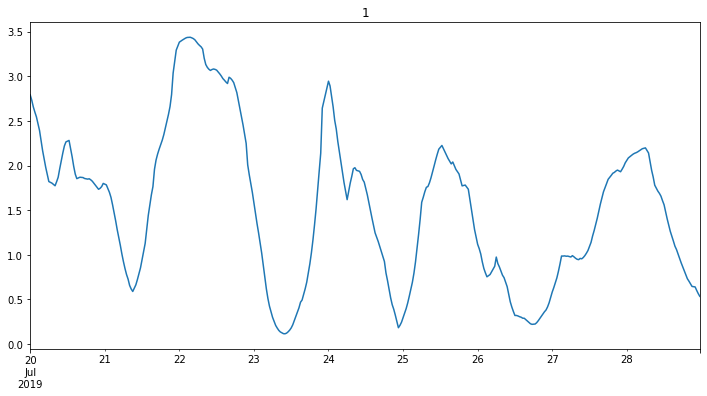

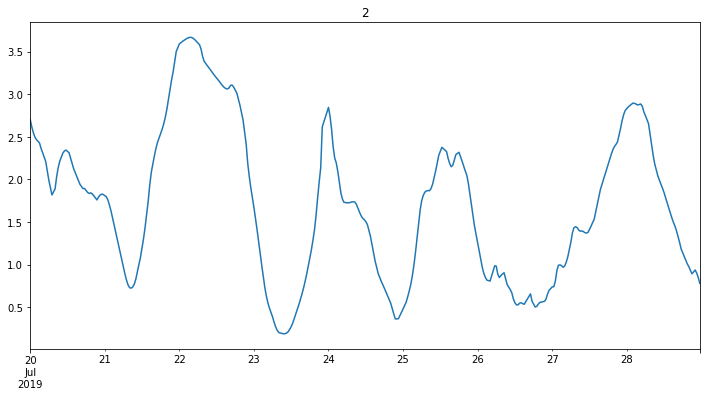

In [9]:
for i in df_feat.columns:
    df_feat.loc['2019-07-20':'2019-07-28',i].plot()
    plt.title(i)
    plt.show()

let's check if nans are gone totaly

In [10]:
print(f'number of NaNs: {df_feat.isna().sum().sum()}')

number of NaNs: 0


# EDA and Data Cleaning

Let's see the the series as a whole

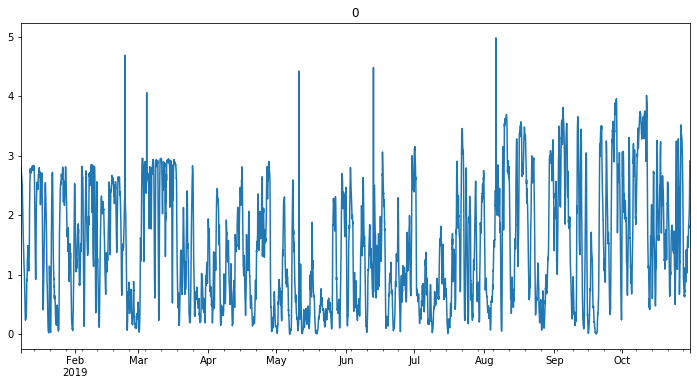

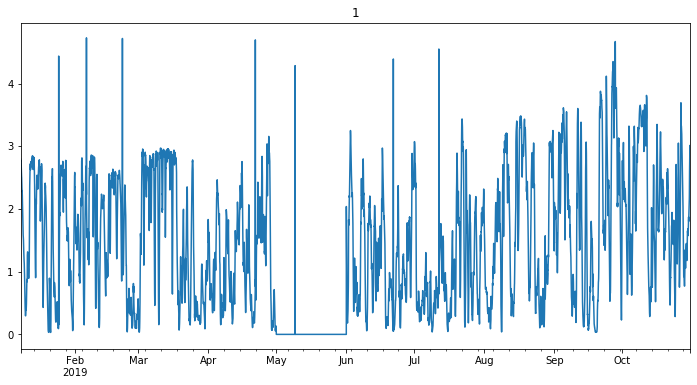

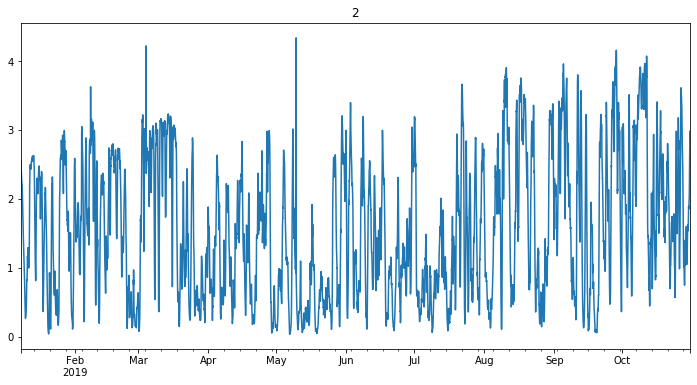

In [11]:
for i in df_feat.columns:
    df_feat[i].plot()
    plt.title(i)
    plt.show()

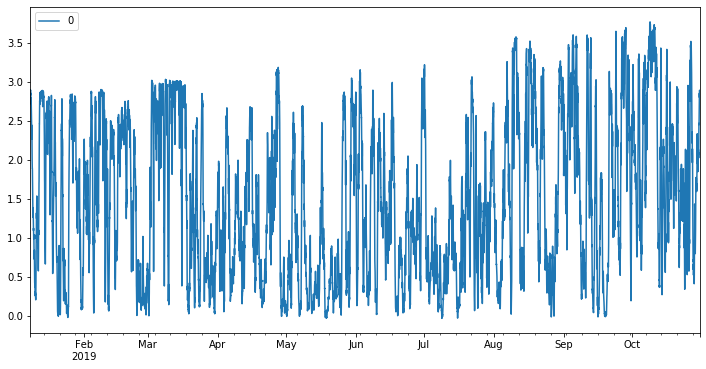

In [12]:
df_target.plot()

My comments are as follow:

* Firstly it looks like there is a seasonality in data. We should check ACF, PACF
* Also the second column raise data quality suspicion as there are parts filled with 0 

Lets clean 0s by doing a cross interpolation 

Cast 0s to None

So we miss data only for one month

In [13]:
df_feat.loc[df_feat[1]<=0,1]= None

In [14]:
df_feat[df_feat[1].isna()]

,0,1,2
2019-05-01 00:00:00+00:00,0.118743,NaN,0.171037
2019-05-01 00:30:00+00:00,0.116958,NaN,0.168872
2019-05-01 01:00:00+00:00,0.115317,NaN,0.168872
2019-05-01 01:30:00+00:00,0.118267,NaN,0.171037
2019-05-01 02:00:00+00:00,0.120933,NaN,0.172120
...,...,...,...
2019-05-31 21:30:00+00:00,2.381436,NaN,2.924956
2019-05-31 22:00:00+00:00,2.401528,NaN,2.785311
2019-05-31 22:30:00+00:00,2.269029,NaN,2.596954
2019-05-31 23:00:00+00:00,2.110992,NaN,2.395606


Let's create a very simple linear regression to fill missing points instead of linear interpolating 

In [15]:
interpolation_df = df_feat.dropna()

In [16]:
interploation_model = LinearRegression()

In [17]:
X = interpolation_df[[0,2]]
y = interpolation_df[1]
interploation_model.fit(X,y)

LinearRegression()

In [18]:
df_feat.isna().sum()

0       0
1    1487
2       0
dtype: int64

In [19]:
pred = pd.Series(interploation_model.predict(df_feat[[0,2]]), index=df_feat.index)

In [20]:
df_feat[1] = df_feat.fillna(pred)

Nice now the input data is fully healthy

Let's see what kind of mistake input forecasts make, i.e is it Gaussian?

In [21]:
errors = pd.DataFrame(df_feat.values - df_target.values, index=df_feat.index)

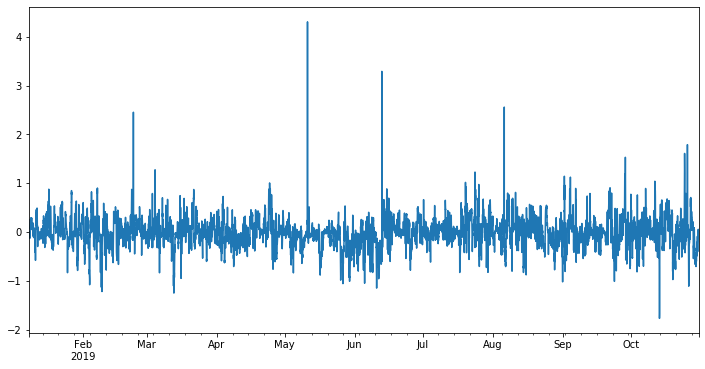

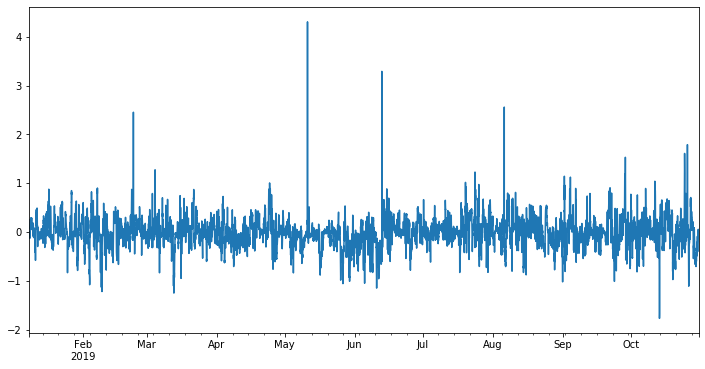

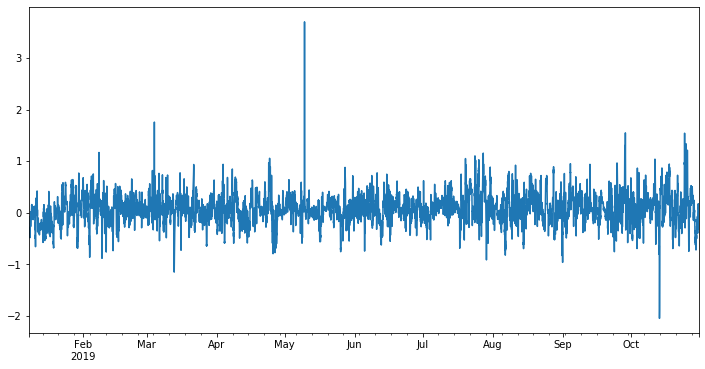

In [22]:
for i in errors.columns:
    errors[i].plot()
    plt.show()

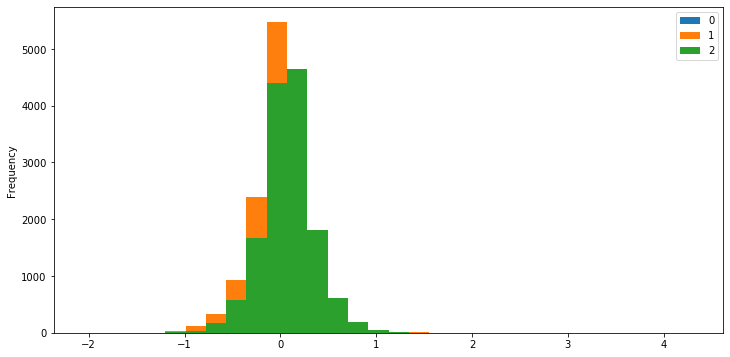

In [23]:
errors.plot.hist(bins=30)

My comments are as follow:

* Firstly it looks like errors still has a kind of autocorrelation (still need to check)
* This makes me think to use error from previous step might be a good candidate feature
* In overall (histogram) plots might be Gaussian but this doesn't mean that there is no autocorrelation 

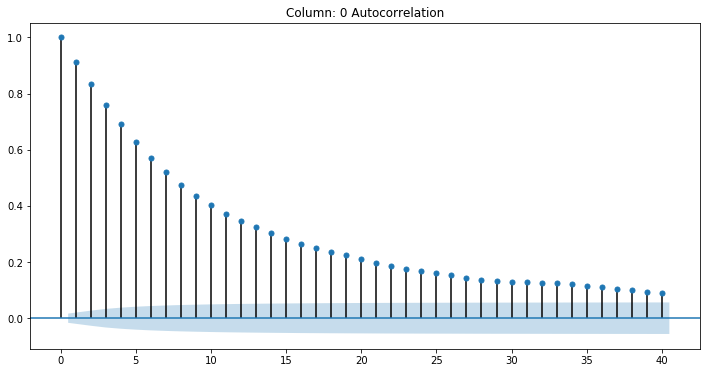

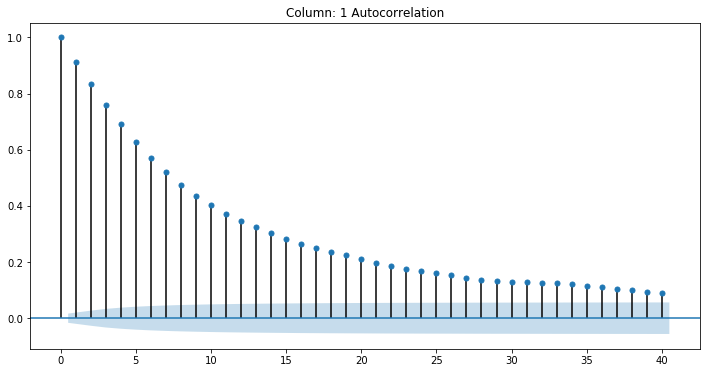

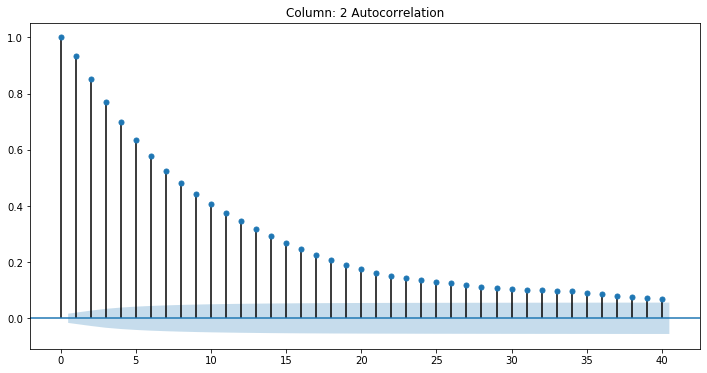

In [24]:
for i in errors.columns:
    sm.graphics.tsa.plot_acf(errors[i].values, lags=40)
    plt.title(f'Column: {i} Autocorrelation')

Okay it looks like there is a great autocorrelation in errors as well but let's see pacf to be sure that the autocorrelation doesn't come from any lags 

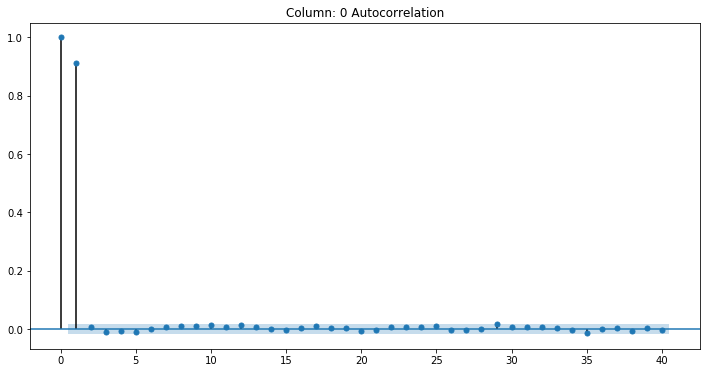

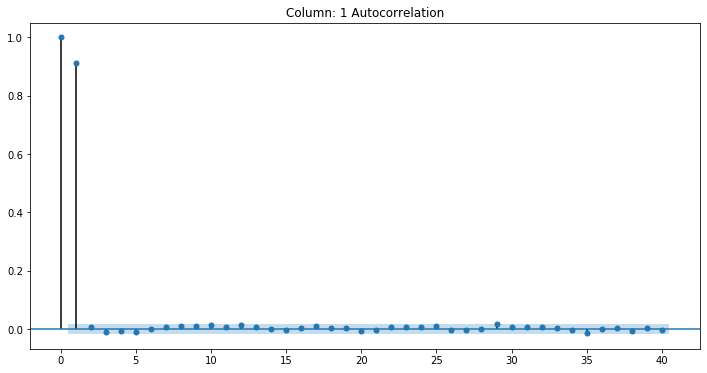

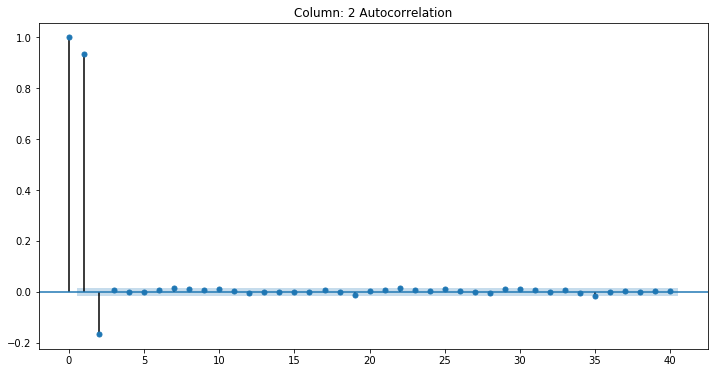

In [25]:
for i in errors.columns:
    sm.graphics.tsa.plot_pacf(errors[i].values, lags=40)
    plt.title(f'Column: {i} Autocorrelation')

This greatly motivates me to include the errors from previous because the errors from the forecasts are not just noise

Finally let's see the correlation matrix of errors and actual values

In [26]:
errors['actual'] = df_target[0]

In [27]:
errors.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,0,1,2,actual
0,1.00,1.00,0.77,-0.14
1,1.00,1.00,0.77,-0.14
2,0.77,0.77,1.00,-0.14
actual,-0.14,-0.14,-0.14,1.00


# Feature Engineering

I will create 2 dataframes 

In [28]:
df_simple = df_feat.copy()

In [29]:
del errors['actual']

In [30]:
errors = errors.shift(1)

In [31]:
df_feat[['prev_error_0','prev_error_1','prev_error_2']] = errors

In [32]:
df_feat = df_feat.dropna()

In [33]:
df_feat.to_csv('data/engineered_features.csv')

# Model

In [34]:
index_till_train = int(len(df_simple)*2/3)
X_train = df_simple.iloc[:index_till_train]
X_test = df_simple.iloc[index_till_train:]
y_train = df_target.loc[X_train.index][0]
y_test = df_target.loc[X_test.index][0]

# Benchmark Model

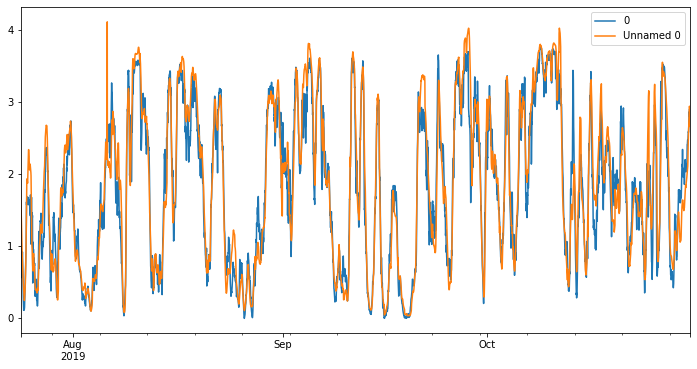

In [35]:
pred = X_test.mean(axis=1)
pd.DataFrame([y_test,pred]).T.plot()

In [36]:
mean_squared_error(y_test,pred)

0.09874851495163883

## Benchmark Model ML

In [37]:
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

LinearRegression()

In [38]:
pred_simple = pd.Series(simple_model.predict(X_test),index=y_test.index, name='pred')

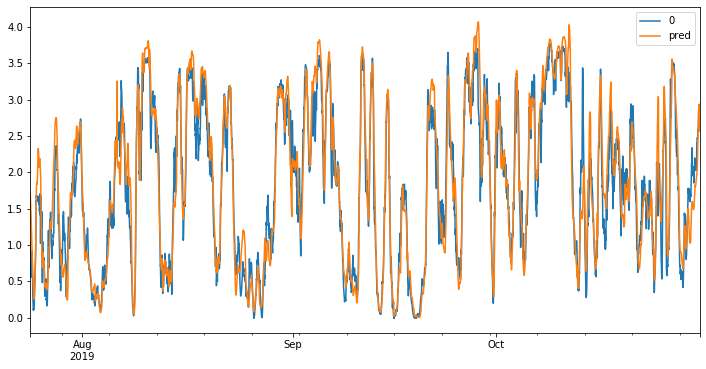

In [39]:
pd.DataFrame([y_test,pred_simple]).T.plot()

In [40]:
mean_squared_error(y_test,pred_simple)

0.09839265326432789

## Proposed Model

One assumption I make is that the model will be able to use previous errors meaning that this will be a time series prediction in a loop. Periodically, the errors will be available with which the model will be retrained and will make predictions again. Here I asuume that the model will be run everyday, so the period is 48

Note that I definitely make sure to not use any future information.

In [41]:
from model import rollingModel

In [42]:
index_till_train = int(len(df_simple)*2/3)
X_train = df_feat.iloc[:index_till_train]
X_test = df_feat.iloc[index_till_train:]
y_train = df_target.loc[X_train.index][0]
y_test = df_target.loc[X_test.index][0]

In [43]:
model = rollingModel(period=48, inner_model=LinearRegression)
model.fit(X_train, y_train)
pred_rolling = model.rolling_predict(X_test, y_test)

In [44]:
pred_rolling = pd.Series(pred_rolling,index=y_test.index, name='pred')

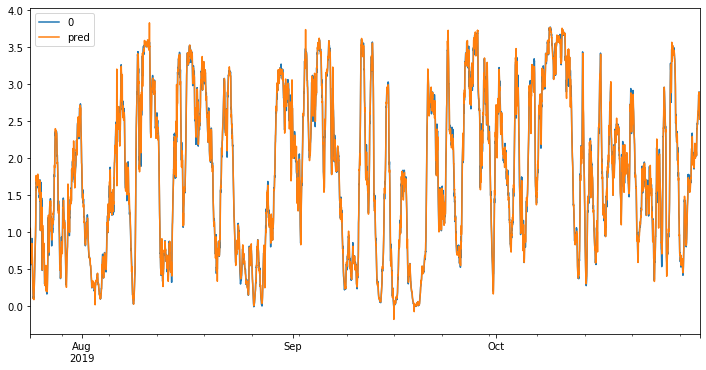

In [45]:
pd.DataFrame([y_test,pred_rolling]).T.plot()

In [46]:
mean_squared_error(y_test, pred_rolling)

0.010436113496766526

# Additional Questions


Technical

    1) Argue why you chose the model you did, and why you did not choose something else?
    2) What would be a good baseline prediction? Why?
    3) Argue why you scored the model how you did.
    4) If you had had more time, what would you have done?


**Answers**

1) I have chosen this model because I think that there might be patterns between forecast errors and actual values. Also predicting at every step makes it available to strengthen the model on the production 

2) A good baseline is the mean of all the forecast

3) I have used mse since this is regression model and big deviations from the actual value should be punished more

4) I would probably try more models. Especially, SARIMA would possibly be next try. Also there might be inprovement using boosting and non-linear models. 


Domain

    1) What is the average weekly production? Does this number sound fair?
    2) Would you expect seasonality in this kind of data? If so, why and what kind?
    3) If you had been able to ask questions about the domain, would that have helped you? What questions would you have asked?


In [47]:
print(f"1) Average weekly production is {df_target.resample('W').sum().mean().iloc[0]} MWh")

1) Average weekly production is 488.47915442157773 MWh


2) I would expect seasonality definitely. For example summer time people use less electricity for heating ligthing. 

3) If I was able to ask domain questions I would  ask the underlying of the forecasts. What kind of features and models are used for obtaining them.

In [48]:
sm.__version__

'0.11.1'